Here, I am trying to Use EM Model on Credit Card Dataset for Clustering and Compare it with other Clustering Algorithms. 

Like Hierarchical, KMeans, and DNScan Algorithm.

Using T-SNE Algorithm to reduce dimensions of data to make it easy to see as 2D

---
`Note:` *The dataset that I am working on it. It's already cleaned from a previous work.*




Go To
1. <a href="#1">Load Dataset (CC GENERAL)</a>
    1.  <a href="#1.1">Transformation</a>
        1. <a href="#1.1.1">Scaling data</a>
        2. <a href="#1.1.2">Dimensionality Reduction</a>

2. <a href="#2">Compare Between EM and Hierarchical, Kmeans, and DBScan</a>
    1. <a href="#2.1">Before Dimensionality Reduction</a>
        1. <a href="#2.1.1">EM Algorthim</a>
        2. <a href="#2.1.2">Compare</a>
    2. <a href="#2.2">After Dimensionality Reduction (use T-SNE) </a>

# <a name="0"><code>Import Libarary</code></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# minpolate in data and visulization 
import pandas as pd
import numpy as np

from plotnine import *
import matplotlib.pyplot as plt

# Scale Algorthim
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Metrics 
from sklearn.metrics import silhouette_score

# ML Algorthims
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

%matplotlib inline

Connect to drive and go to path where the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/ITI_Project/ML2/L4

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITI_Project/ML2/L4


# <a name="1"><code>Load Dataset (CC GENERAL)</code></a>

In [ ]:
# import data 
df = pd.read_csv("CC GENERAL_clean.csv")
df

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,3.735304,0.597837,0.000000,4.568506,0.000000,0.166667,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277
1,8.071989,0.646627,0.000000,0.000000,7.932202,0.000000,0.000000,0.223144,0.000000,8.853808,8.319725,6.978531
2,7.822504,0.693147,6.651791,0.000000,0.000000,1.000000,0.559616,0.000000,2.564949,8.922792,6.434654,6.442994
3,6.707735,0.693147,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.693147,7.090910,6.521114,5.504483
4,7.501540,0.693147,0.000000,7.066973,0.000000,0.666667,0.000000,0.000000,2.197225,7.496097,7.244983,7.786654
...,...,...,...,...,...,...,...,...,...,...,...,...
8631,1.927413,0.543616,3.086487,0.000000,0.000000,0.166667,0.154151,0.000000,0.693147,6.216606,4.088408,3.794898
8632,3.384170,0.693147,0.000000,5.677165,0.000000,1.000000,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748
8633,3.194529,0.606136,0.000000,4.979489,0.000000,0.833333,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869
8634,2.671218,0.606136,0.000000,0.000000,3.625907,0.000000,0.000000,0.154151,0.000000,6.216606,3.980615,4.038755


## <a name="1.1"><code>Transformation</code></a>

### <a name="1.1.1"><code>Scaling data</code></a>

In [ ]:
# df_scaled = pd.DataFrame(StandardScaler().fit_transform(df))
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df))

### <a name="1.1.2"><code>Dimensionality Reduction</code></a>

In [ ]:
# df_copy = df_scaled.copy()
df_copy = df.copy()
df_copy.shape

(8636, 12)

#### PCA

In [ ]:

pca = PCA(2)

df_pca = pca.fit_transform(StandardScaler().fit_transform(df_copy))
df_pca = pd.DataFrame(df_pca, columns=['x','y'])


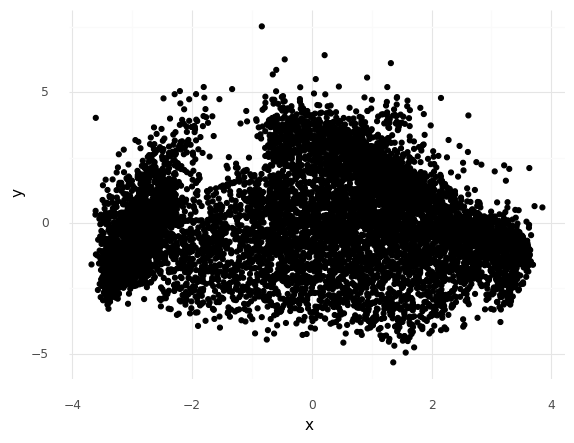

<ggplot: (8740780698553)>

In [ ]:
ggplot(df_pca, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

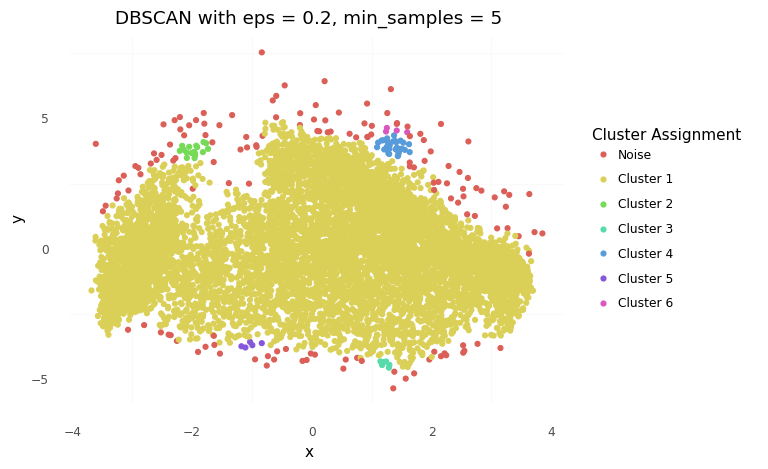

<ggplot: (8740778751525)>

In [ ]:
eps = 0.2
min_samples = 5
db2 = DBSCAN(eps = eps, min_samples = min_samples).fit(df_pca)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2.labels_)))]

df_pca["assignments"] = db2.labels_
(ggplot(df_pca, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = f'DBSCAN with eps = {eps}, min_samples = {min_samples}'))

#### T-SNE

In [ ]:

x_tsne = TSNE(n_components=2, learning_rate='auto', init='warn').fit_transform(df_copy)
x_tsne.shape

(8636, 2)

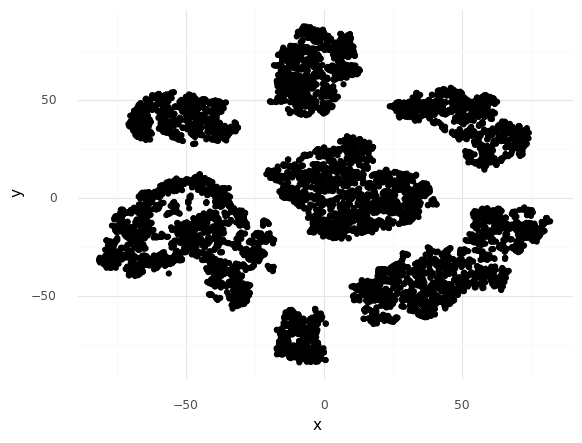

<ggplot: (8740782010197)>

In [ ]:
df_tsne = pd.DataFrame(x_tsne, columns=['x','y'])
# plt.figure(figsize= (10,7))
# plt.plot(d5);
ggplot(df_tsne, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

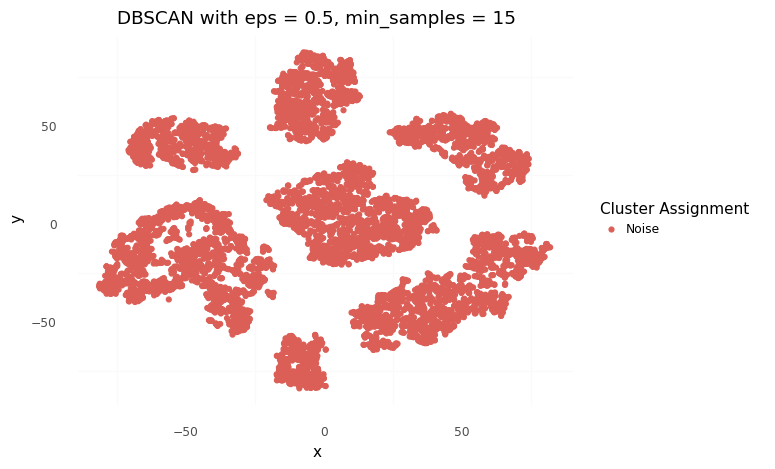

<ggplot: (8740781003489)>

In [ ]:
eps = 0.5
min_samples = 15
db2 = DBSCAN(eps = eps, min_samples = min_samples).fit(df_tsne)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2.labels_)))]

df_tsne["assignments"] = db2.labels_
(ggplot(df_tsne, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = f'DBSCAN with eps = {eps}, min_samples = {min_samples}'))

# <a name="2"><code>Compare Between EM and Hierarchical, Kmeans, and DBScan</code></a>

## <a name="2.1"><code>Before Dimensionality Reduction</code></a>

In [ ]:
# df_copy_without_DR = df_scaled.copy()
df_copy_without_DR = df.copy()

### <a name="2.1.1"><code>EM Algorthim </code></a>

In [ ]:
# Implement EM From Sklearn 

k_cluster = 6
modle_em = GaussianMixture(k_cluster)

modle_em.fit(df_copy_without_DR)
modle_em_predicted = modle_em.predict(df_copy_without_DR)

# measure The score of Algorthim
score_em = silhouette_score(df_copy_without_DR, modle_em_predicted)
print('Score of KMeans : ', score_em)

Score of KMeans :  0.4474990554861617


### <a name="2.1.2"><code>Compare</code></a>

In [ ]:
def compare_without_DR(df, k, eps, min_s):
    # ******************* EM *******************
    k_cluster = k
    df_copy_without_DR = df
    modle_em = GaussianMixture(k_cluster)
    modle_em.fit(df_copy_without_DR)
    modle_em_predicted = modle_em.predict(df_copy_without_DR)

    # measure The score of Algorthim
    score_em = silhouette_score(df_copy_without_DR, modle_em_predicted)

    # ******************* KMeans *******************
    modle_KMeans = KMeans(k_cluster)
    modle_KMeans.fit(df_copy_without_DR)
    modle_KMeans_predicted = modle_KMeans.labels_

    # measure The score of Algorthim
    score_KMeans = silhouette_score(df_copy_without_DR, modle_KMeans_predicted)

    
    # ******************* DBSCAN *******************
    modle_DBSCAN = DBSCAN(eps = eps, min_samples =min_s)

    modle_DBSCAN.fit(df_copy_without_DR)
    modle_DBSCAN_predicted = modle_DBSCAN.labels_

    # measure The score of Algorthim
    score_DBSCAN = silhouette_score(df_copy_without_DR, modle_DBSCAN_predicted)

    # ******************* AgglomerativeClustering *******************
    modle_Agg = AgglomerativeClustering(k_cluster)

    modle_Agg.fit(df_copy_without_DR)
    modle_Agg_predicted = modle_Agg.labels_

    # measure The score of Algorthim
    score_Agg = silhouette_score(df_copy_without_DR, modle_Agg_predicted)

    # ******************* Scores *******************

    print('Score of KMeans : ', score_KMeans)
    print('Score of EM : ', score_em)
    print('Score of DBSCAN : ', score_DBSCAN)
    print('Score of AgglomerativeClustering : ', score_Agg)


In [ ]:
compare_without_DR(df_copy_without_DR, 6, 0.6, 20)

Score of KMeans :  0.4560525868866004
Score of EM :  0.43712942590979276
Score of DBSCAN :  -0.25685979372616125
Score of AgglomerativeClustering :  0.4500731588519195


## <a name="2.2"><code>After Dimensionality Reduction (use T-SNE) </code></a>

In [ ]:
df_copy_with_DR = df_tsne.copy()

In [ ]:
def compre_fun(x, k=2 ):

    hac = AgglomerativeClustering(k)
    km = KMeans(k)
    gm = GaussianMixture(k)

    d4 = x
    hac.fit(d4[["x","y"]])
    km.fit(d4[["x","y"]])
    gm.fit(d4[["x","y"]])

    d4["hac"] = hac.labels_
    d4["km"] = km.labels_
    d4["gm"] = gm.predict(d4[["x","y"]])


    print(ggplot(d4, aes(x = "x", y = "y",
                        color = "factor(hac)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) + 
                labs(title = "Hierarchical Agglomeretive"))


    print(ggplot(d4, aes(x = "x", y = "y",
                        color = "factor(km)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) + 
                labs(title = "KMeans"))


    print(ggplot(d4, aes(x = "x", y = "y",
                        color = "factor(gm)")) +
                geom_point() +
                theme_minimal() +
                scale_color_discrete(name = "Cluster Assignment") +
                theme(panel_grid_major = element_blank()) + 
                labs(title = "Gaussian Mixtures"))

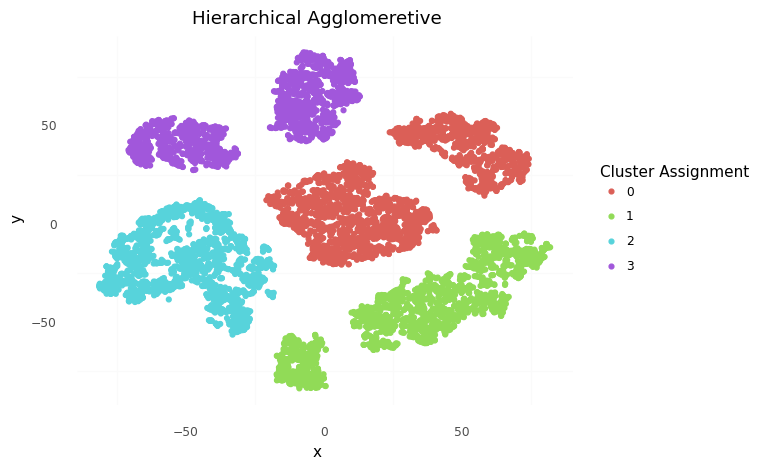

<ggplot: (8740780693225)>


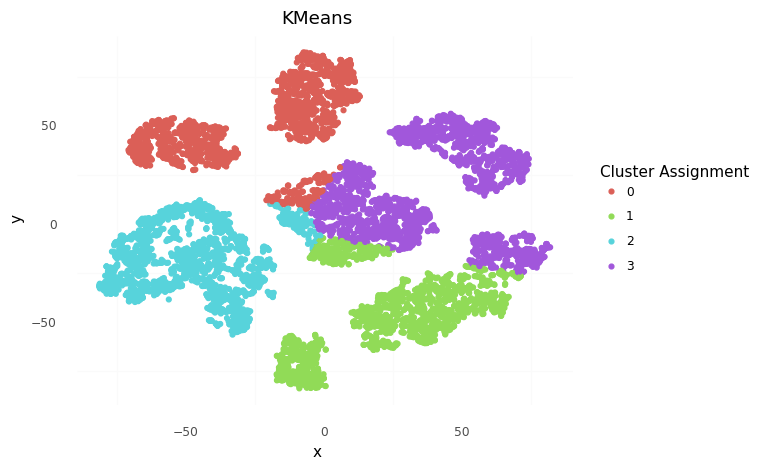

<ggplot: (8740781658109)>


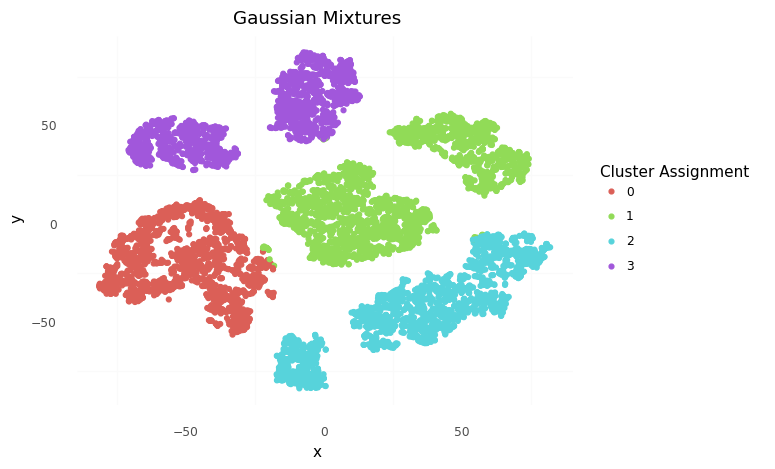

<ggplot: (8740780679085)>


In [ ]:
compre_fun(df_copy_with_DR, k=4)

try with number of cluster = 6

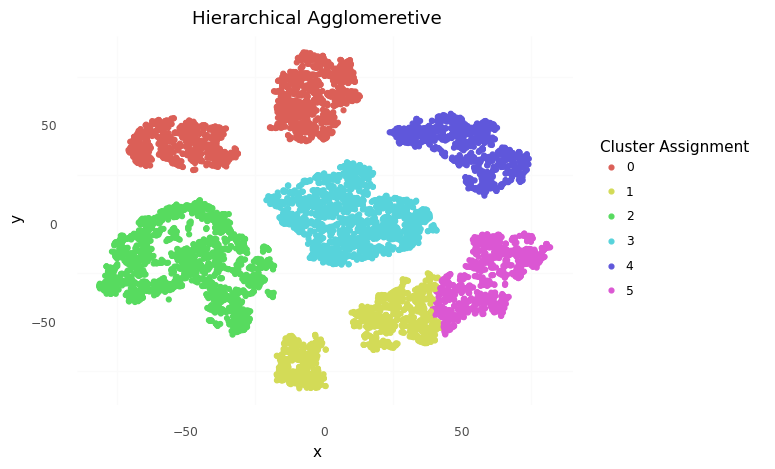

<ggplot: (8740781735253)>


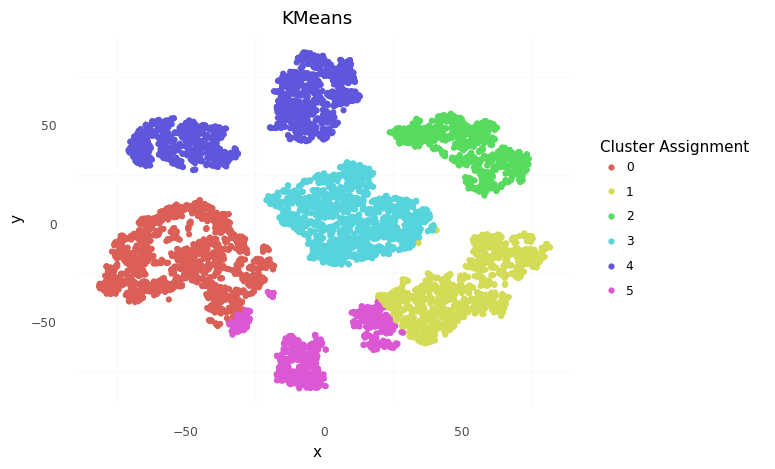

<ggplot: (8740781792781)>


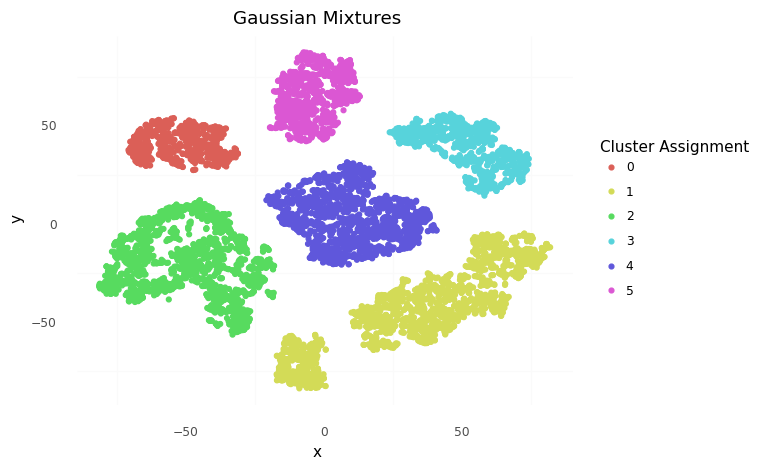

<ggplot: (8740780827373)>


In [ ]:
compre_fun(df_copy_with_DR, k=6)

# Annomaly Detection 

## Example in 2D

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
#define x1 and x2 
x1 = np.arange(1,50,1) 
x2 = np.square(x1) + np.random.randint(-200,200)
#adding outliers
x1 = np.append(x1,17)
x2 = np.append(x2,1300)
data = np.stack((x1,x2),axis=1)
plt.scatter(x1,x2)

In [ ]:
from scipy.stats import multivariate_normal
#calculate the covariance matrix
data = np.stack((x1,x2),axis=0)
covariance_matrix = np.cov(data)
print(data)
#calculating the mean
mean_values = [np.mean(x1),np.mean(x2)]

#multivariate normal distribution
model = multivariate_normal(cov=covariance_matrix,mean=mean_values)
data = np.stack((x1,x2),axis=1)

#finding the outliers
threshold = 1.0e-07
outlier = model.pdf(data).reshape(-1) < threshold


[[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
    15   16   17   18   19   20   21   22   23   24   25   26   27   28
    29   30   31   32   33   34   35   36   37   38   39   40   41   42
    43   44   45   46   47   48   49   17]
 [  58   61   66   73   82   93  106  121  138  157  178  201  226  253
   282  313  346  381  418  457  498  541  586  633  682  733  786  841
   898  957 1018 1081 1146 1213 1282 1353 1426 1501 1578 1657 1738 1821
  1906 1993 2082 2173 2266 2361 2458 1300]]


## Implemint in our data that have outlier

In [ ]:
df_not_clean = pd.read_csv("CC GENERAL.csv")
df_not_clean

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df_not_clean.dropna(inplace=True)

In [ ]:
df_not_clean.drop(columns=['CUST_ID'], inplace=True)

we can detect the oultier for each column

In [ ]:
num_cols = df_not_clean.describe().columns.to_list()
outliers = []
for col in num_cols:
    covariance_matrix = np.cov(df_not_clean[col].T)

    #calculating the mean
    mean_values = df_not_clean[col].mean()

    #multivariate normal distribution
    model = multivariate_normal(cov=covariance_matrix,mean=mean_values)


    #finding the outliers
    threshold = 1.0e-7
    outliers.append(model.pdf(df_not_clean[col]).reshape(-1) < threshold)


In [ ]:
np.array(df_not_clean.iloc[:,0][outliers[0]].index)

outiers_value = df_not_clean.iloc[:,0][outliers[0]]
outiers_value.index

Int64Index([  30,  124,  128,  138,  143,  153,  174,  376,  380,  393,  491,
             495,  501,  520,  550,  585,  643,  669,  708,  723,  755,  851,
             853,  856,  866,  883,  939, 1012, 1450, 1697, 1767, 1781, 1920,
            2088, 2159, 2361, 2403, 2422, 2454, 2485, 2593, 2780, 2823, 2878,
            3123, 3181, 3210, 3491, 3501, 3510, 3806, 4089, 4102, 4140, 4252,
            4376, 4437, 4481, 4505, 4708, 4753, 4754, 5281, 5488, 5544, 5737,
            5913, 6078, 6479, 6629, 7764, 7962],
           dtype='int64')

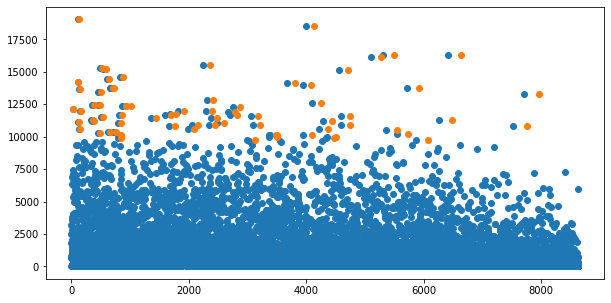

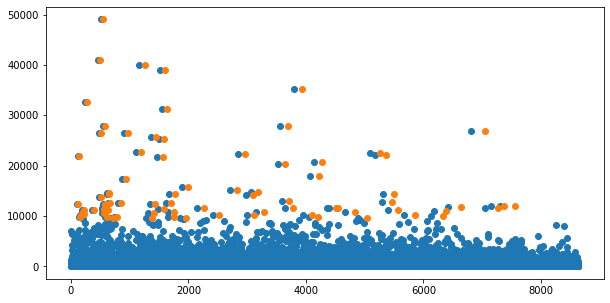

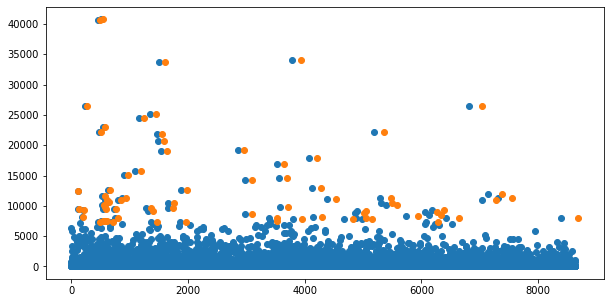

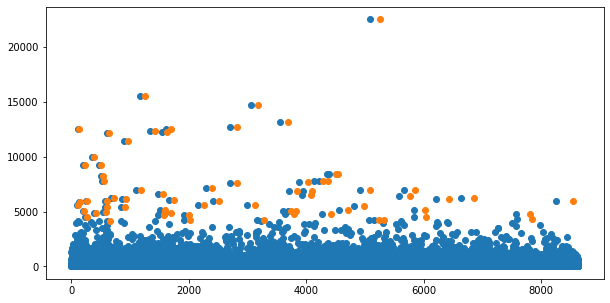

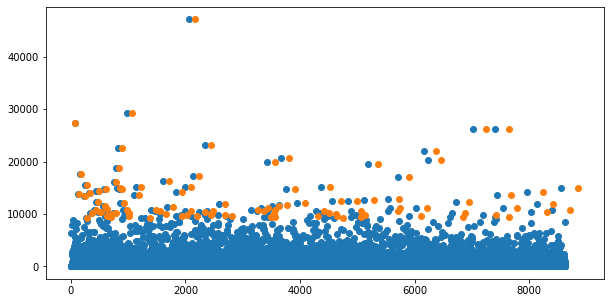

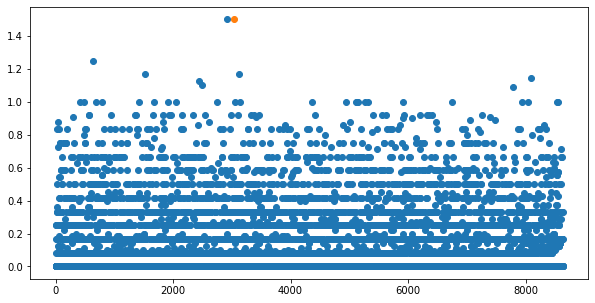

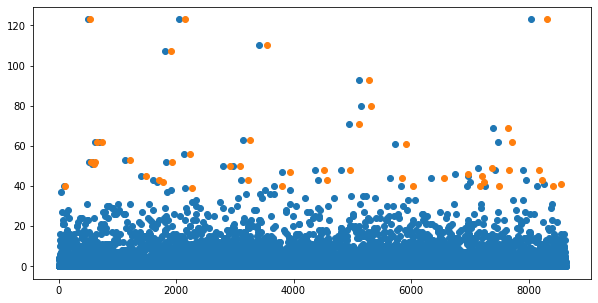

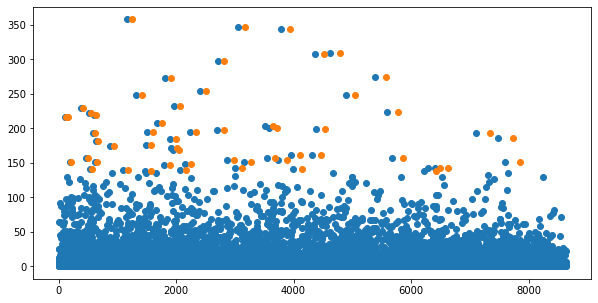

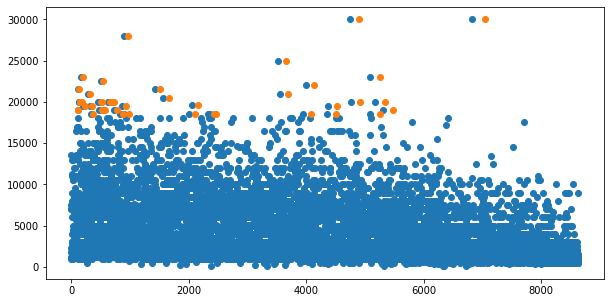

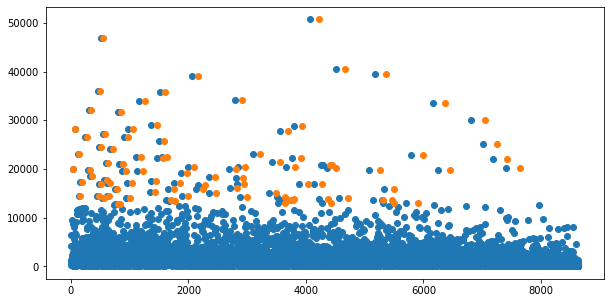

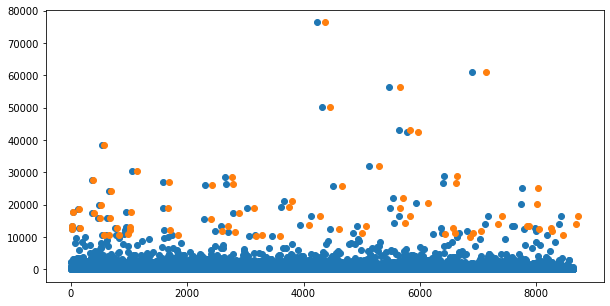

In [ ]:

for i, outlier in enumerate(outliers):
    outiers_value = df_not_clean.iloc[:,i][outlier]
    index_value = outiers_value.index
    
    if len(outiers_value) >0:
        plt.figure(figsize=(10,5))
        plt.scatter(np.arange(df_not_clean.shape[0]), df_not_clean.iloc[:,i])
        plt.scatter(index_value, outiers_value)
        plt.show()


    # for ii, value in enumerate(outlier):
    #     print()